In [12]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons  # For non-linear data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.pipeline import make_pipeline 

In [13]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=41)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

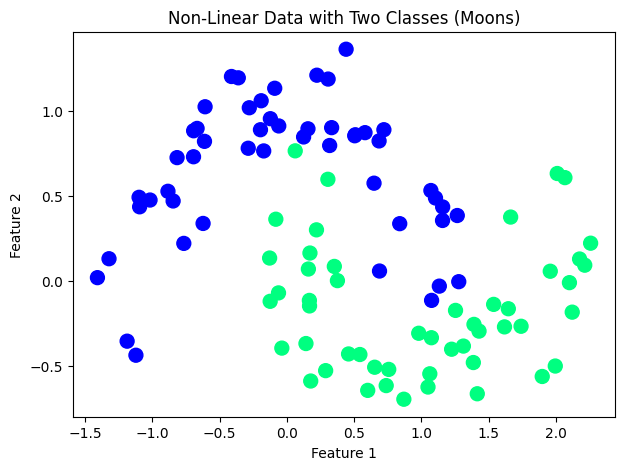

In [15]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.title("Non-Linear Data with Two Classes (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),  # Add polynomial features for non-linearity
    LogisticRegression(solver='lbfgs')
)

In [17]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

In [18]:
print("Model coefficients:", model.named_steps['logisticregression'].coef_)
print("Model intercept:", model.named_steps['logisticregression'].intercept_)

Model coefficients: [[-1.47522825e-04  7.48639069e-01 -1.75505996e+00 -2.52127235e-01
  -2.75760579e-01 -1.37499363e-01]]
Model intercept: [0.5058629]


In [19]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict for each point in the meshgrid
Z = Z.reshape(xx.shape)

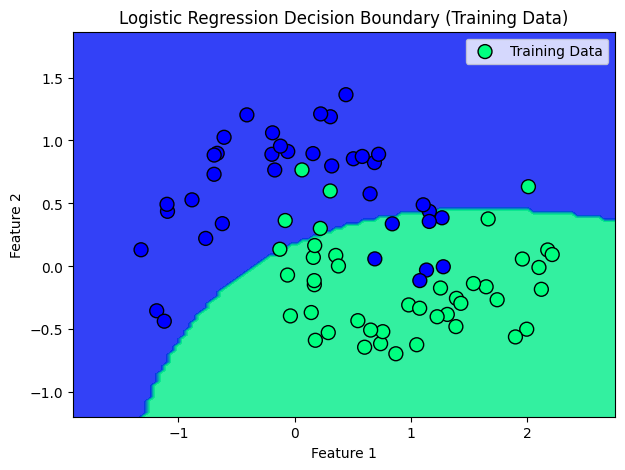

In [20]:
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='winter')  # Decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='winter', s=100, label="Training Data")
plt.title("Logistic Regression Decision Boundary (Training Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

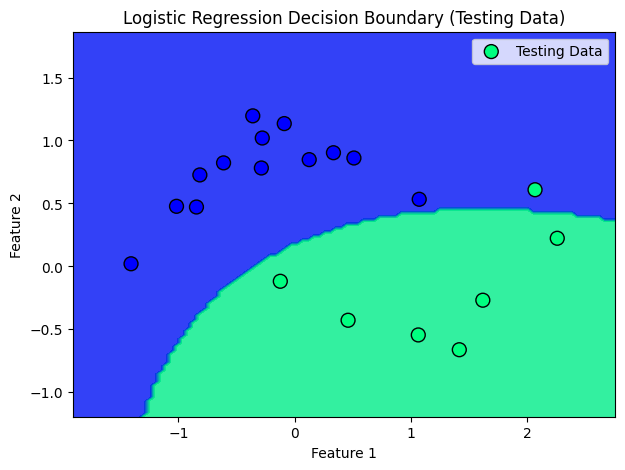

In [21]:
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='winter')  # Decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='winter', s=100, label="Testing Data")
plt.title("Logistic Regression Decision Boundary (Testing Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()